# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Đoàn Ngọc Mai
- MSSV: 21127014
- Lớp: 21CLC05

# Import

In [1]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần
# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
selected_features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain']

X_train_a = train[selected_features]    # Dataframe (chứa 11 đặc trưng huấn luyện)
y_train_a = train.iloc[:, -1]           # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test_a = test[selected_features]       # Dataframe (chứa 11 đặc trưng kiểm tra)
y_test_a = test.iloc[:, -1]              # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)
    
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

def perform_cross_validation(X_train, y_train, personality_features, k=5):
    list_mae = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for feature in personality_features:
        X_train_feature = X_train[[feature]]
        y_train_feature = y_train

        total_mae = 0

        for train_idx, test_idx in kf.split(X_train_feature):
            train_X, test_X = X_train_feature.iloc[train_idx], X_train_feature.iloc[test_idx]
            train_y, test_y = y_train_feature.iloc[train_idx], y_train_feature.iloc[test_idx]

            lr = OLSLinearRegression()
            lr.fit(train_X, train_y)

            y_pred = lr.predict(test_X)
            mae_value = mae(test_y, y_pred)
            total_mae += mae_value

        avg_mae = total_mae / k
        list_mae.append([feature, avg_mae])

    sorted_mae = sorted(list_mae, key=lambda x: x[1])
    best_feature = sorted_mae[0][0]

    prediction_df = pd.DataFrame(list_mae, columns=['Feature', 'MAE'])
    prediction_df.index = np.arange(1, len(prediction_df) + 1)

    return best_feature, prediction_df

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [4]:
# Phần code cho yêu cầu 1a
lr = OLSLinearRegression().fit(X_train_a, y_train_a)
lr.get_params()

0    -22756.512821
1       804.503156
2      1294.654565
3    -91781.897531
4     23182.388679
5      1437.548672
6     -8570.661985
7       147.858299
8       152.888476
9       117.221846
10    34552.286221
dtype: float64

In [5]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = lr.predict(X_test_a)
print('MAE: ', mae(y_test_a, y_hat))

MAE:  104863.77754033149


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 \times (\text{Gender}) + 804.503 \times (\text{10percentage}) + 1294.655 \times (\text{12percentage}) + (-91781.898) \times (\text{CollegeTier}) + 23182.389 \times (\text{Degree}) + 1437.549 \times (\text{collegeGPA}) + (-8570.662) \times (\text{CollegeCityTier}) + 147.858 \times (\text{English}) + 152.888 \times (\text{Logical}) + 117.222 \times (\text{Quant}) + 34552.286 \times (\text{Domain})
$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [6]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
personality_features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

#best_feature, prediction_df = perform_cross_validation(X_train, y_train, personality_features)

#print('The best feature is:', best_feature)
#prediction_df


# Khởi tạo số lượng chia (k) và danh sách lưu MAE
k = 5
list_mae = []

# Khởi tạo đối tượng KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for feature in personality_features:
    # Lấy đặc trưng tính cách hiện tại
    X_train_feature = X_train[[feature]]
    y_train_feature = y_train

    # Khởi tạo biến để tính tổng MAE
    total_mae = 0

    # Thực hiện k-fold Cross Validation
    for train_idx, test_idx in kf.split(X_train_feature):
        train_X, test_X = X_train_feature.iloc[train_idx], X_train_feature.iloc[test_idx]
        train_y, test_y = y_train_feature.iloc[train_idx], y_train_feature.iloc[test_idx]

        # Xây dựng và huấn luyện mô hình OLS Linear Regression
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)

        # Dự đoán và tính MAE trên tập kiểm tra
        y_pred = lr.predict(test_X)
        mae_value = mae(test_y, y_pred)
        total_mae += mae_value

    # Tính MAE trung bình và lưu vào danh sách
    avg_mae = total_mae / k
    list_mae.append([feature, avg_mae])

# Sắp xếp danh sách MAE và tìm đặc trưng tốt nhất
sorted_mae = sorted(list_mae, key=lambda x: x[1])
best_feature = sorted_mae[0]
print('The best feature is:', best_feature[0])

# Tạo DataFrame hiển thị kết quả
prediction_df = pd.DataFrame(list_mae, columns=['Feature', 'MAE'])
prediction_df.index = prediction_df.index + 1  # Điều chỉnh chỉ số để bắt đầu từ 1

# Hiển thị DataFrame
prediction_df.to_numpy()
prediction_df

The best feature is: nueroticism


,Feature,MAE
1,conscientiousness,306309.201775
2,agreeableness,300912.677678
3,extraversion,307030.102690
4,nueroticism,299590.049823
5,openess_to_experience,302957.691854


In [7]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_feature_name = sorted_mae[0][0]

# Lấy đặc trưng tốt nhất từ tập huấn luyện
X_train_best = X_train[[best_feature_name]]

# Huấn luyện lại mô hình với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_feature_model = OLSLinearRegression().fit(X_train_best, y_train)

# Lấy thông số mô hình
best_feature_params = best_feature_model.get_params()
print("Best Feature Model Parameters:", best_feature_params)

#best_feature_name = prediction_df.loc[1, 'Feature']
#X_train_best = X_train[[best_feature_name]]
#best_personality_feature_model = OLSLinearRegression().fit(X_train_best, y_train)
#best_feature_params = best_personality_feature_model.get_params()
#print("Best Feature Model Parameters:", best_feature_params)

Best Feature Model Parameters: 0   -56546.303753
dtype: float64


In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model

y_hat_best = best_feature_model.predict(X_test[best_feature[0]].values.reshape(-1, 1))
print('MAE:', mae(y_test, y_hat_best))

#y_hat_best = best_personality_feature_model.predict(X_test[[best_feature_name]])
#mae_best = mae(y_test, y_hat_best)
#print('MAE:', mae_best)

MAE: 291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times (\text{nueroticism})$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [9]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Khởi tạo danh sách các đặc trưng cần thử nghiệm
selected_features = ['English', 'Logical', 'Quant']

#best_skill, prediction_df = perform_cross_validation(X_train, y_train, selected_features)

#print('The best feature is:', best_skill)
#prediction_df

# Khởi tạo danh sách các đặc trưng cần thử nghiệm
selected_features = ['English', 'Logical', 'Quant']
#best_skill, prediction_df = perform_cross_validation(X_train, y_train, selected_features)

# Khởi tạo số lượng chia (k) và danh sách lưu MAE
k = 500
list_mae = []

# Khởi tạo đối tượng KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for feature in selected_features:
    # Lấy đặc trưng hiện tại
    X_train_feature = X_train[[feature]]
    y_train_feature = y_train

    # Khởi tạo biến để tính tổng MAE
    total_mae = 0

    # Thực hiện k-fold Cross Validation
    for train_idx, test_idx in kf.split(X_train_feature):
        train_X, test_X = X_train_feature.iloc[train_idx], X_train_feature.iloc[test_idx]
        train_y, test_y = y_train_feature.iloc[train_idx], y_train_feature.iloc[test_idx]

        # Xây dựng và huấn luyện mô hình OLS Linear Regression
        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)

        # Dự đoán và tính MAE trên tập kiểm tra
        y_pred = lr.predict(test_X)
        mae_value = mae(test_y, y_pred)
        total_mae += mae_value

    # Tính MAE trung bình và lưu vào danh sách
    avg_mae = total_mae / k
    list_mae.append([feature, avg_mae])

# Sắp xếp danh sách MAE và tìm đặc trưng tốt nhất
sorted_mae = sorted(list_mae, key=lambda x: x[1])
best_feature = sorted_mae[0]
print('The skill best feature model is:', best_feature[0])

# Tạo DataFrame hiển thị kết quả
prediction_df = pd.DataFrame(list_mae, columns=['Mô hình với 1 đặc trưng', 'MAE'])
prediction_df.index = prediction_df.index + 1  # Điều chỉnh chỉ số để bắt đầu từ 1

# Hiển thị DataFrame
#prediction_df.to_numpy()
prediction_df

The skill best feature model is: Quant


,Mô hình với 1 đặc trưng,MAE
1,English,121968.055178
2,Logical,120373.889636
3,Quant,118033.764567


In [10]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

# Lấy tên đặc trưng tốt nhất từ danh sách MAE
best_feature_name = sorted_mae[0][0]

# Lấy đặc trưng tốt nhất từ tập huấn luyện
X_train_best = X_train[[best_feature_name]]

# Huấn luyện lại mô hình với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_skill_feature_model = OLSLinearRegression().fit(X_train_best, y_train)

# Lấy thông số mô hình
best_feature_params = best_skill_feature_model.get_params()
print("Best Skill Feature Model Parameters:", best_feature_params)

Best Skill Feature Model Parameters: 0    585.895381
dtype: float64


In [11]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_hat_best = best_skill_feature_model.predict(X_test[best_feature[0]].values.reshape(-1, 1))
print('MAE:', mae(y_test, y_hat_best))

MAE: 106819.5776198967


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times (\text{Quant})$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [12]:
# Trình bày các phần tìm ra mô hình

### Tìm giá trị tương quan

In [13]:
train_cor = pd.read_csv('train.csv')
correlations = train_cor.corr()
#print(correlations)

### Trực quan hóa các giá trị tương quan

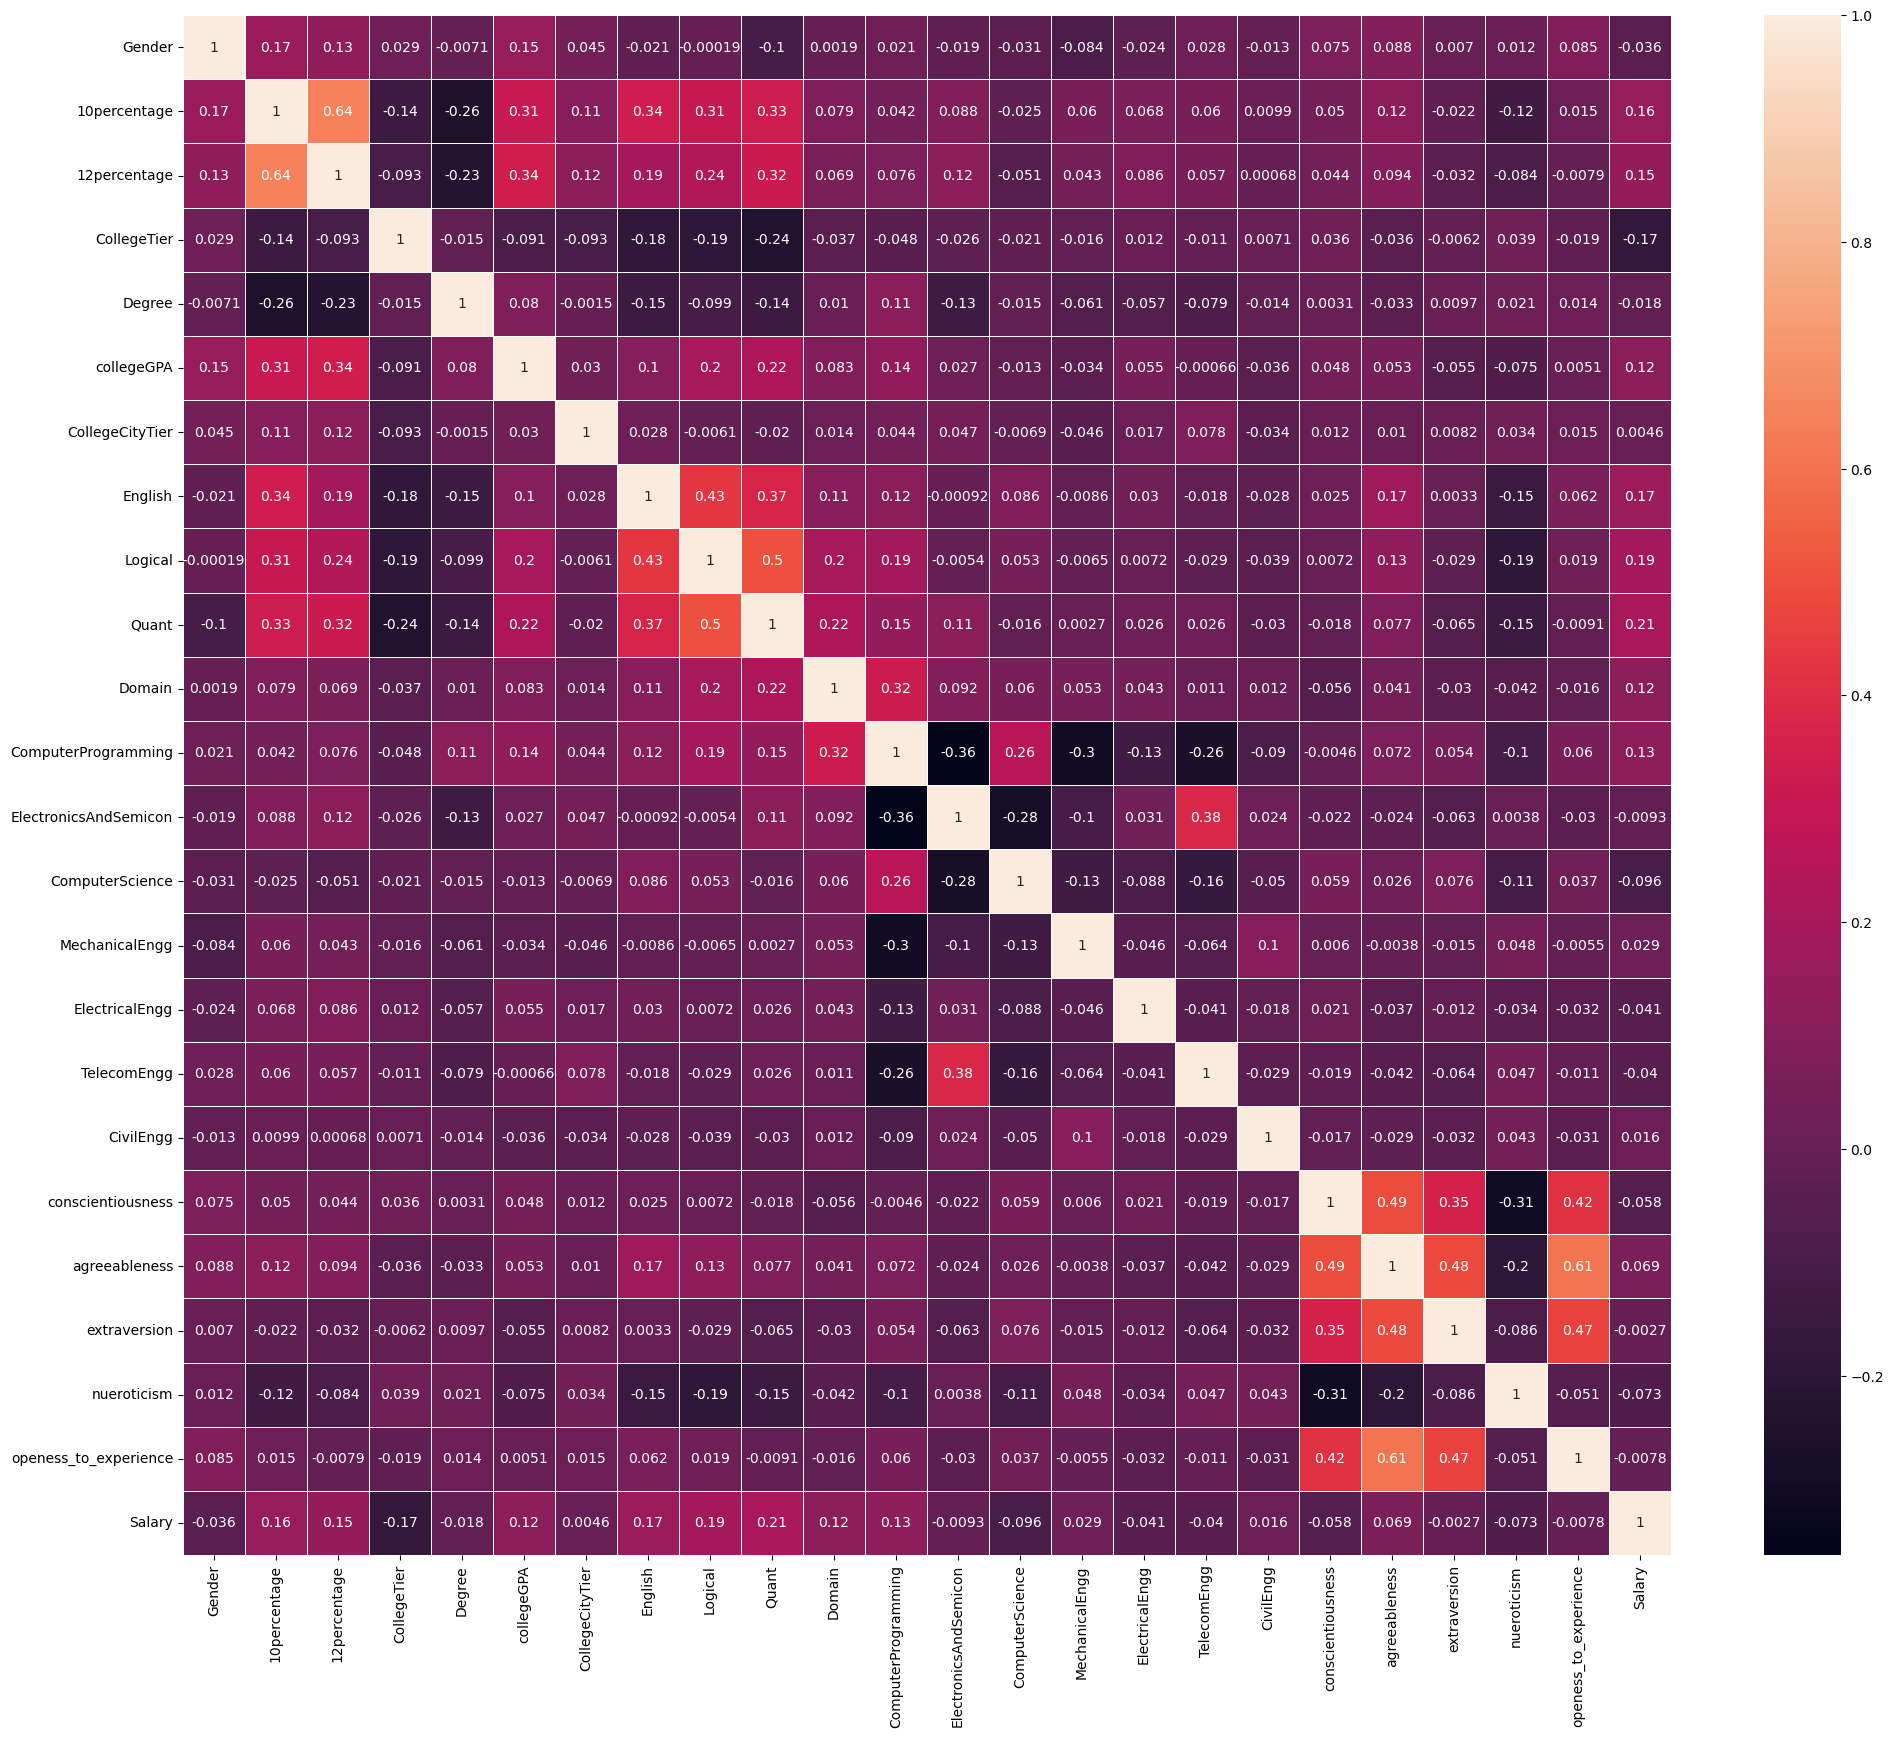

In [14]:
# Tạo ma trận tương quan
matrix = train_cor.corr()

# Tạo biểu đồ heatmap
fig, ax = plt.subplots(figsize=(24, 20))
sns.heatmap(matrix, annot=True, linewidths=.5, ax=ax)

# Hiển thị biểu đồ
plt.show()

### Lấy ra những giá trị tương quan liên quan đến Salary 

In [15]:
correlations_2 = train_cor.corr()['Salary'].drop('Salary')
print(correlations_2)

Gender                  -0.036183
10percentage             0.155174
12percentage             0.149531
CollegeTier             -0.174824
Degree                  -0.017602
collegeGPA               0.122469
CollegeCityTier          0.004575
English                  0.169293
Logical                  0.188416
Quant                    0.205358
Domain                   0.122022
ComputerProgramming      0.125866
ElectronicsAndSemicon   -0.009292
ComputerScience         -0.095507
MechanicalEngg           0.028854
ElectricalEngg          -0.041217
TelecomEngg             -0.040415
CivilEngg                0.016150
conscientiousness       -0.057699
agreeableness            0.068623
extraversion            -0.002661
nueroticism             -0.073401
openess_to_experience   -0.007814
Name: Salary, dtype: float64


#### Lấy những đặc trưng có tương quan giá trị tuyệt đối >= 0.1

In [16]:
y_tr = y_train.copy()


# Lấy các giá trị tương quan của feature với 'Salary'
correlations_with_salary = correlations['Salary'].drop('Salary')

# Lấy chỉ mục (tên) của các feature có giá trị tuyệt đối >= 0.1
selected_features_gt_01 = correlations_with_salary[correlations_with_salary.abs() >= 0.1].index

#### Lấy những đặc trưng có tương quan giá trị tuyệt đối >= 0 (tất cả các đặc trưng)

In [17]:
# Lấy chỉ mục (tên) của các feature có giá trị tuyệt đối >= 0
selected_features_gt_0 = correlations_with_salary[correlations_with_salary.abs() >= 0].index

#### Lấy những đặc trưng có tương quan giá trị tuyệt đối >= 0.05

In [18]:
# Lấy chỉ mục (tên) của các feature có giá trị tuyệt đối >= 0.05
selected_features_gt_05 = correlations_with_salary[correlations_with_salary.abs() >= 0.05].index

arr = [selected_features_gt_01, selected_features_gt_0, selected_features_gt_05]

## Thử nghiệm, so sánh các mô hình

In [19]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu
# Danh sách các phép biến đổi

transformations = ['Mô hình gốc', 'Mô hình mũ hai', 'Mô hình căn ba']
list_models = []

# Lặp qua từng mô hình và phép biến đổi
for i in range(3):
    for transform_name in transformations:
        # Xác định hàm biến đổi dựa trên tên phép biến đổi
        if transform_name == 'Mô hình gốc':
            transform_func = np.copy
        elif transform_name == 'Mô hình căn ba':
            transform_func = np.square
        else:
            transform_func = np.cbrt
        
        # Áp dụng phép biến đổi lên tập huấn luyện và tập kiểm tra
        transformed_train = transform_func(X_train[arr[i]]).copy()
        transformed_test = transform_func(X_test[arr[i]]).copy()
        
        # Thêm thông tin về mô hình và dữ liệu biến đổi vào danh sách
        list_models.append([transform_name + ' ' + str(i+1), transformed_train, transformed_test])
        
list_best = []
# Số lượng folds
k = 5

# Khởi tạo đối tượng KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for model in list_models:
    MAE = 0
    selected_columns = arr[i] if isinstance(model[1], pd.DataFrame) else None
    mod_df = pd.DataFrame(model[1], columns=selected_columns)  # Convert numpy array to DataFrame
    for train_idx, test_idx in kf.split(mod_df):
        train_X, test_X = mod_df.iloc[train_idx], mod_df.iloc[test_idx]
        train_y, test_y = y_tr.iloc[train_idx], y_tr.iloc[test_idx]

        lr = OLSLinearRegression()
        lr.fit(train_X, train_y)
        y_pred = lr.predict(test_X)
        MAE += mae(test_y, y_pred)

    list_best.append([model[0], MAE / k])

prediction = pd.DataFrame(list_best, columns=['Mô hình', 'MAE'])
prediction

,Mô hình,MAE
0,Mô hình gốc 1,112840.317733
1,Mô hình mũ hai 1,306899.059639
2,Mô hình căn ba 1,306899.059639
3,Mô hình gốc 2,110420.413776
4,Mô hình mũ hai 2,112537.827936
5,Mô hình căn ba 2,111126.449920
6,Mô hình gốc 3,110689.047691
7,Mô hình mũ hai 3,112537.827936
8,Mô hình căn ba 3,111126.449920


In [20]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_best_model = X_train[arr[1]].copy()
y_best_model = y_train.copy()
X_test_best_model = X_test[arr[1]].copy()

my_best_model = OLSLinearRegression()
my_best_model.fit(X_best_model, y_best_model)

my_best_model.get_params()

0    -23874.541727
1       898.575621
2      1203.496112
3    -83592.387591
4     11515.430757
5      1626.518605
6     -5717.733852
7       153.434567
8       120.511333
9       102.580853
10    27939.639602
11       76.730246
12      -47.746793
13     -177.387649
14       33.932559
15     -151.471153
16      -64.197706
17      145.894996
18   -19814.830268
19    15503.266941
20     4908.582006
21   -10661.029100
22    -5815.021280
dtype: float64

In [21]:
print(arr[1])

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [22]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_pred = my_best_model.predict(X_test_best_model)
print('MAE:', mae(y_test, y_pred))

MAE: 101872.2105661925


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23874.542 \times \text{Gender} + 898.576 \times \text{10percentage} + 1203.496 \times \text{12percentage} - 83592.387 \times \text{CollegeTier} + 11515.430 \times \text{Degree} + 1626.519 \times \text{collegeGPA} - 5717.734 \times \text{CollegeCityTier} + 153.435 \times \text{English} + 120.511 \times \text{Logical} + 102.581 \times \text{Quant} + 27939.639 \times \text{Domain} + 76.730 \times \text{ComputerProgramming} - 47.747 \times \text{ElectronicsAndSemicon} - 177.388 \times \text{ComputerScience} + 33.932 \times \text{MechanicalEngg} - 151.471 \times \text{ElectricalEngg} - 64.197 \times \text{TelecomEngg} + 145.895 \times \text{CivilEngg} - 19814.830 \times \text{conscientiousness} + 15503.267 \times \text{agreeableness} + 4908.582 \times \text{extraversion} + 10661.029 \times \text{nueroticism} - 5815.021 \times \text{openess_to_experience}$$